# Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data

In [59]:
# Read Data
df = pd.read_csv("hotel_bookings.csv", index_col="index")
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
index,,,,,,,,,,,,,,,,,,,,,
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015


In [3]:
# Drop any duplicates and null
df.drop_duplicates()
df.dropna()
df.shape

(119390, 32)

In [73]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340

In [97]:
df.customer_type.value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

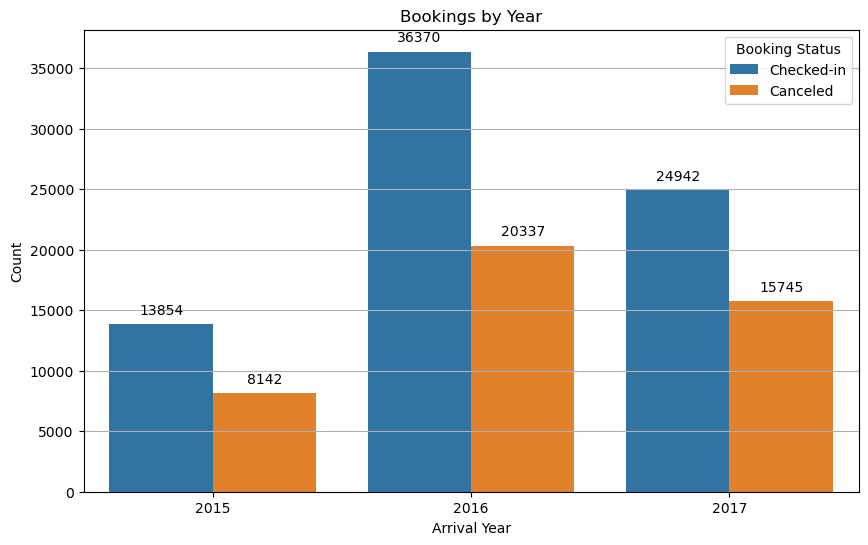

In [92]:

# Count the number of bookings for each combination of arrival year and cancellation status
cancel_counts = df.groupby(['arrival_date_year', 'is_canceled']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
        
plt.title('Bookings by Year')
plt.xlabel('Arrival Year')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Checked-in', 'Canceled'])
plt.grid(axis='y')
plt.show()

# Visualization

In [68]:
# Bookings year 2015-2017
bookings = df[['hotel', 'is_canceled']]
checked_in = bookings.query('is_canceled == 0')
canceled = bookings.query('is_canceled == 1')
hotels = list(bookings.hotel.unique())
hotels.reverse()
hotel_checked_in = list(checked_in.value_counts())
hotel_canceled = list(canceled.value_counts())
hotel_status = {
    "Canceled": hotel_canceled,
    "Check-in": hotel_checked_in,
}

In [5]:
# Create function to check bookings by year
def bookings_by_year(year):
    bookings = df[['hotel', 'is_canceled', 'arrival_date_year']]
    b_year = bookings[bookings.arrival_date_year == year]
    checked_in = b_year.query('is_canceled == 0')
    canceled = b_year.query('is_canceled == 1')
    hotel_checked_in = list(checked_in.value_counts())
    hotel_canceled = list(canceled.value_counts())
    hotel_status = {
        "Canceled": hotel_canceled,
        "Check-in": hotel_checked_in,
    }
    return hotel_status
bookings_by_year(2015)

{'Canceled': [6004, 2138], 'Check-in': [7678, 6176]}

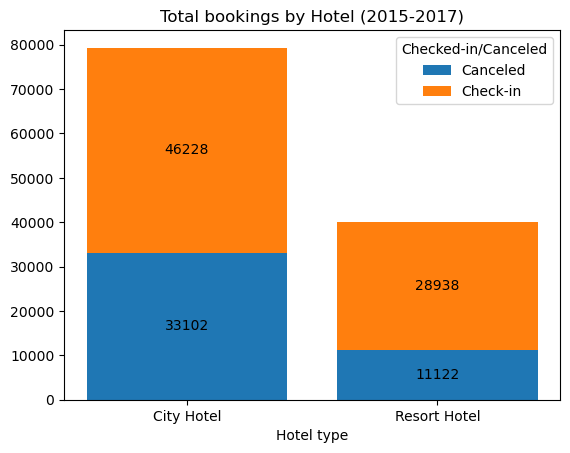

In [6]:
fig, ax = plt.subplots()
bottom = np.zeros(2)

for status, count in hotel_status.items():
    p = ax.bar(hotels, count, label=status, bottom=bottom)
    bottom += count
    
    ax.bar_label(p, label_type='center')

ax.set_xlabel('Hotel type')
ax.set_title('Total bookings by Hotel (2015-2017)')
ax.legend(title='Checked-in/Canceled')
plt.show()

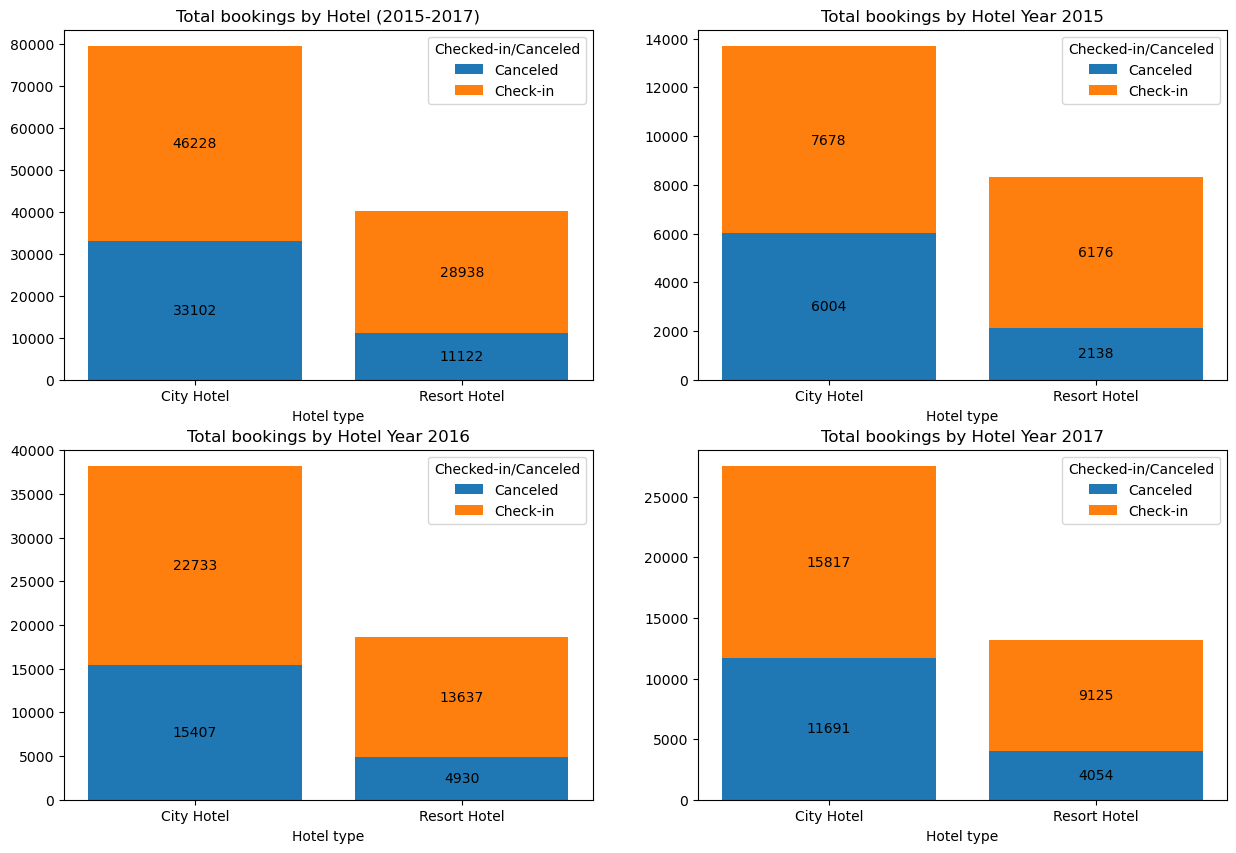

In [7]:

fig, axs = plt.subplots(2, 2, figsize=(15,10))

bottom = np.zeros(2)

# Total Bookings Year(2015-2017)

for status, count in hotel_status.items():
    p = axs[0, 0].bar(hotels, count, label=status, bottom=bottom)
    bottom += count
    axs[0, 0].bar_label(p, label_type='center')

axs[0, 0].set_xlabel('Hotel type')
axs[0, 0].set_title('Total bookings by Hotel (2015-2017)')
axs[0, 0].legend(title='Checked-in/Canceled')

# Total Bookings Year 2015

status = bookings_by_year(2015)
bottom = np.zeros(2)

for status, count in status.items():
    p = axs[0, 1].bar(hotels, count, label=status, bottom=bottom)
    bottom += count
    axs[0, 1].bar_label(p, label_type='center')

axs[0, 1].set_xlabel('Hotel type')
axs[0, 1].set_title('Total bookings by Hotel Year 2015')
axs[0, 1].legend(title='Checked-in/Canceled')

# Total Bookings Year 2016

status = bookings_by_year(2016)
bottom = np.zeros(2)

for status, count in status.items():
    p = axs[1, 0].bar(hotels, count, label=status, bottom=bottom)
    bottom += count
    axs[1, 0].bar_label(p, label_type='center')

axs[1, 0].set_xlabel('Hotel type')
axs[1, 0].set_title('Total bookings by Hotel Year 2016')
axs[1, 0].legend(title='Checked-in/Canceled')

# Total Bookings Year 2017

status = bookings_by_year(2017)
bottom = np.zeros(2)

for status, count in status.items():
    p = axs[1, 1].bar(hotels, count, label=status, bottom=bottom)
    bottom += count
    axs[1, 1].bar_label(p, label_type='center')

axs[1, 1].set_xlabel('Hotel type')
axs[1, 1].set_title('Total bookings by Hotel Year 2017')
axs[1, 1].legend(title='Checked-in/Canceled')

plt.show()

In [8]:
# Create function to check bookings by year
def bookings_by_year(year):
    bookings = df[['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month']]
    b_year = bookings[bookings.arrival_date_year == year]
    checked_in, canceled = list(b_year.is_canceled.value_counts())
    hotel_status = {
        "Check-in": checked_in,
        "Canceled": canceled,
    }
    return hotel_status
bookings_by_year(2015)

{'Check-in': 13854, 'Canceled': 8142}

In [9]:
years = list(df.arrival_date_year.unique())
bookings_by_year_data = {year: bookings_by_year(year) for year in years}
print(bookings_by_year_data)

{2015: {'Check-in': 13854, 'Canceled': 8142}, 2016: {'Check-in': 36370, 'Canceled': 20337}, 2017: {'Check-in': 24942, 'Canceled': 15745}}


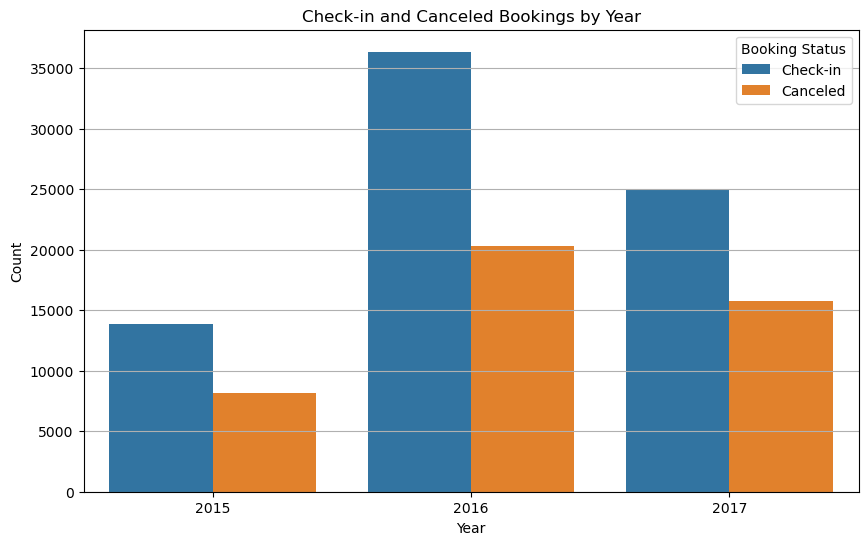

In [61]:
years = list(df.arrival_date_year.unique())
yearly_df = pd.DataFrame({year: bookings_by_year(year) for year in years}).T
yearly_df.index.name = 'Year'
yearly_df.reset_index(inplace=True)

df_long = yearly_df.melt(id_vars='Year', var_name='Booking Status', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Count', hue='Booking Status', data=df_long)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Check-in and Canceled Bookings by Year')
plt.grid(axis='y')
plt.show()

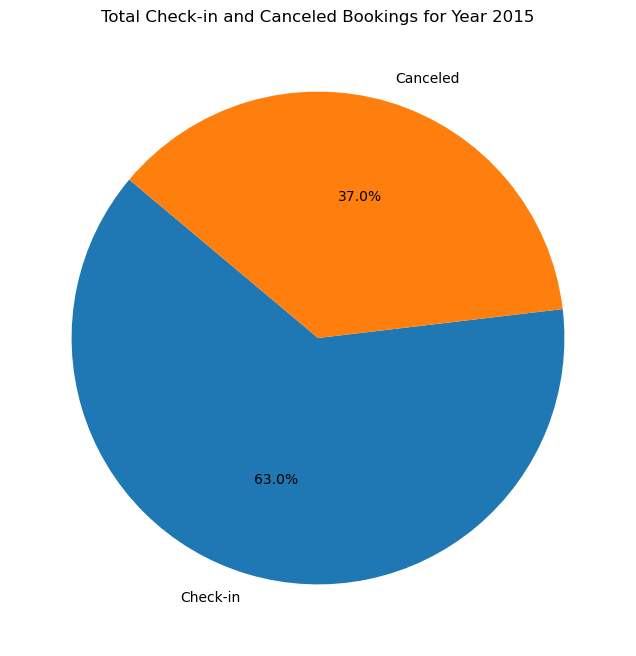

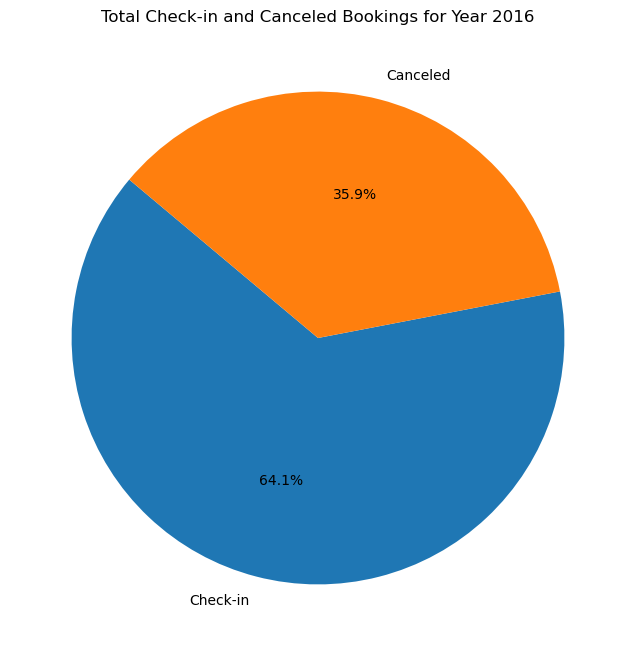

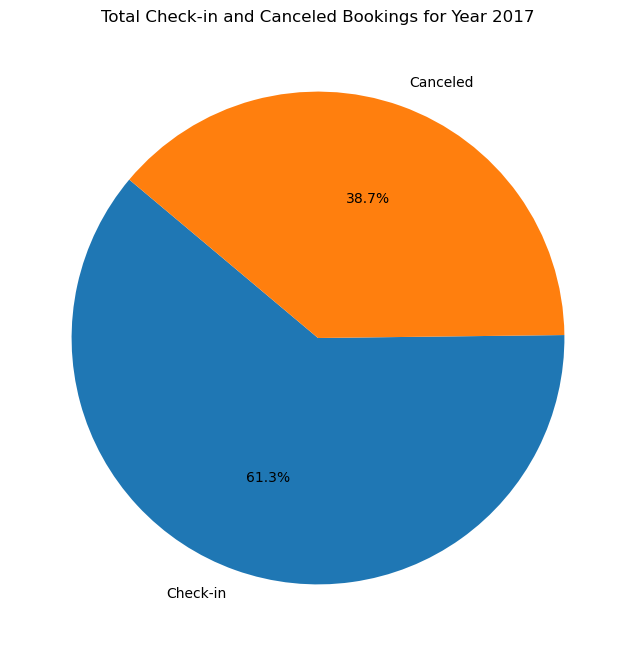

In [71]:
for year in years:
    yearly_data = bookings_by_year(year)
    total_counts = sum(yearly_data.values())

    plt.figure(figsize=(8, 8))
    plt.pie(yearly_data.values(), labels=yearly_data.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f'Total Check-in and Canceled Bookings for Year {year}')
    plt.show()

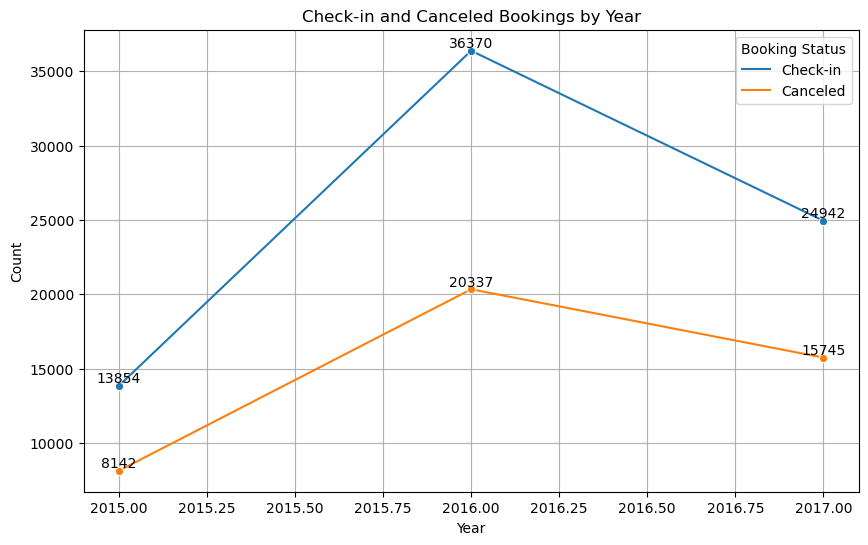

In [93]:
# Using Line plot

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Count', hue='Booking Status', data=df_long, marker='o')

for index, row in df_long.iterrows():
    plt.text(row['Year'], row['Count'], str(row['Count']), color='black', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Check-in and Canceled Bookings by Year')
plt.grid(True)
plt.show()

In [16]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


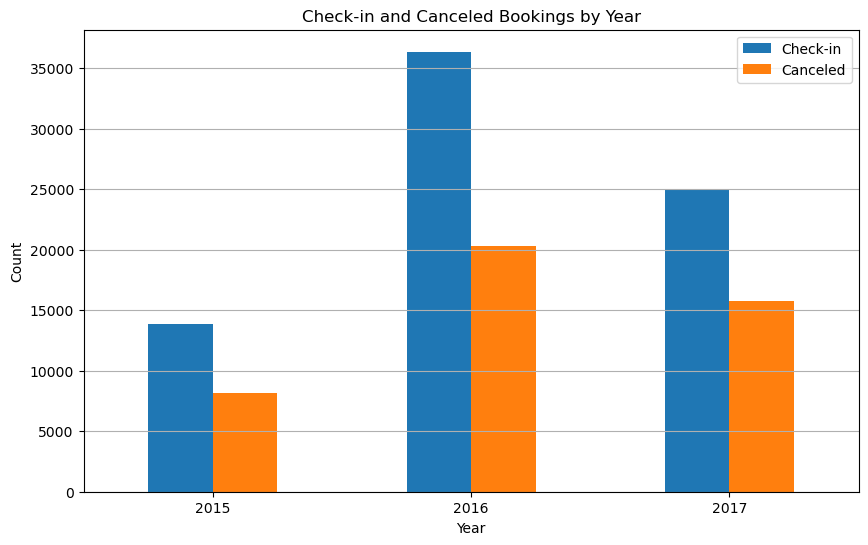

In [56]:
data = {
    2015: {'Check-in': 13854, 'Canceled': 8142},
    2016: {'Check-in': 36370, 'Canceled': 20337},
    2017: {'Check-in': 24942, 'Canceled': 15745}
}

# Create DataFrame
df = pd.DataFrame(data).T

# Rename index to 'Year'
df.index.name = 'Year'

# Plot DataFrame
df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Check-in and Canceled Bookings by Year')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

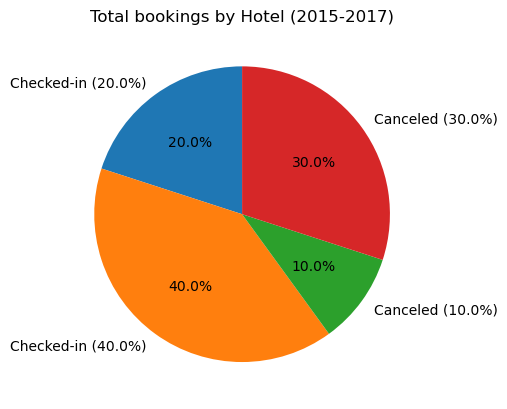

In [66]:
# Sample data
hotel_status = {'Checked-in': [10, 20], 'Canceled': [5, 15]}
hotels = ['Hotel A', 'Hotel B']

# Plotting the pie chart
fig, ax = plt.subplots()
total_bookings = sum([sum(count) for count in hotel_status.values()])
ax.pie([count for sublist in hotel_status.values() for count in sublist],
       labels=[f"{status} ({count / total_bookings * 100:.1f}%)"
               for status, count_list in hotel_status.items() for count in count_list],
       autopct='%1.1f%%', startangle=90)
ax.set_title('Total bookings by Hotel (2015-2017)')
plt.show()

In [ ]:
Here's the sample data in CSV:

index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,,,0,Transient,0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,,,0,Transient,0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,,,0,Transient,75,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,,0,Transient,75,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,,0,Transient,98,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,,0,Transient,98,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,,,0,Transient,107,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,,0,Transient,103,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,,0,Transient,82,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15,,0,Transient,105.5,0,0,Canceled,22-04-15

Here is the description of the data:

hotel: The type of hotel (Categorical)
is_canceled: Indicates whether the booking was canceled (Binary)
lead_time: The number of days between the booking date and the arrival date (Numerical)
arrival_date_year: The year of the arrival date (Numerical)
arrival_date_month: The month of the arrival date (Categorical)
arrival_date_week_number: The week number of the arrival date (Numerical)
arrival_date_day_of_month: The day of the month of the arrival date (Numerical)
stays_in_weekend_nights: The number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay at the hotel (Numerical)
stays_in_week_nights: The number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel (Numerical)
adults: The number of adults included in the booking (Numerical)
children: The number of children included in the booking (Numerical)
babies: The number of babies included in the booking (Numerical)
meal: The type of meal booked (Categorical)
country: The country of origin for each guest who made a reservation (Categorical)
market_segment: The market segment that individuals belong to when making reservations (Categorical)
distribution_channel: The channel through which bookings were made (Categorical)
is_repeated_guest: Indicates whether the guest is a repeated visitor (Binary)
previous_cancellations: The number of times guests previously canceled their bookings (Numerical)
previous_bookings_not_canceled: The count of previous bookings made by guests that were not canceled (Numerical)
reserved_room_type: The type of room initially reserved (Categorical)
assigned_room_type: The type of room that was assigned to guests. (Categorical)
booking_changes: The number of changes made to the booking. (Numerical)
deposit_type: The type of deposit made for the booking. (Categorical)
agent: The ID of the travel agency that made the booking. (Categorical)
company: The ID of the company that made the booking. (Categorical)
days_in_waiting_list: The number of days the booking was on the waiting list before being confirmed. (Numerical)
customer_type: The type of customer (e.g., transient, contract, group, or other). (Categorical)
adr: The average daily rate (price per room) for the booking. (Numerical)
required_car_parking_spaces: The number of car parking spaces required by the guest. (Numerical)
total_of_special_requests: The total number of special requests made by the guest (e.g., extra bed, room amenities). (Numerical)
reservation_status: The status of the reservation (e.g., canceled, checked-in, no-show). (Categorical)
reservation_status_date: The date on which the reservation status was last updated. (Date)



Time Series Plot:

A line plot showing demand (e.g., number of bookings) over time, with time on the x-axis (e.g., dates) and demand on the y-axis. This helps visualize overall trends, seasonality, and fluctuations in demand over time.
Seasonal Decomposition:

A seasonal decomposition plot can help decompose the time series into its trend, seasonal, and residual components. This provides insights into seasonal patterns and overall trend, helping in understanding the underlying factors driving demand.
Histogram:

A histogram of demand distribution can help visualize the frequency distribution of demand values. This provides insights into the variability and central tendency of demand data.
Box Plot:

A box plot can be used to visualize the distribution of demand across different time periods (e.g., months or weeks). This helps identify outliers, variability, and central tendency of demand within each time period.
Heatmap:

A heatmap can be used to visualize demand patterns across different time periods (e.g., months) and other categorical variables (e.g., market segment). This helps identify patterns and trends in demand based on different factors.
Correlation Matrix:

A correlation matrix can help visualize the correlation between demand and other relevant variables (e.g., lead time, average daily rate). This helps identify variables that are strongly correlated with demand and can be useful for forecasting.
Forecast Plot:

A plot showing actual demand alongside forecasted demand can help evaluate the performance of the forecasting model. This provides insights into the accuracy of the forecast and helps identify any discrepancies between actual and predicted demand.
Error Metrics Plot:

A plot showing error metrics (e.g., RMSE, MAE) over time or across different forecasting models can help compare the performance of different models and identify the most accurate one.



Time Series Plot:

Column: arrival_date_year, arrival_date_month, arrival_date_day_of_month
Data: demand (e.g., number of bookings)

Seasonal Decomposition:

Column: arrival_date_year, arrival_date_month, arrival_date_day_of_month
Data: demand (e.g., number of bookings)
Histogram:

Data: demand (e.g., number of bookings)
Box Plot:

Column: arrival_date_month (or any other relevant time period)
Data: demand (e.g., number of bookings)
Heatmap:

Columns: arrival_date_month, market_segment (or any other relevant categorical variable)
Data: demand (e.g., number of bookings)
Correlation Matrix:

Columns: lead_time, average_daily_rate, previous_cancellations, total_of_special_requests, etc.
Data: demand (e.g., number of bookings)
Forecast Plot:

Column: arrival_date_year, arrival_date_month, arrival_date_day_of_month
Data: actual_demand vs forecasted_demand
Error Metrics Plot:

Data: Error metrics (e.g., RMSE, MAE) for different forecasting models

In [105]:
guest_origin_first10 = df["country"].value_counts(sort= True).head(10)
guest_origin_first10 = pd.DataFrame(guest_origin_first10)
guest_origin_first10 = guest_origin_first10.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "country", data= guest_origin_first10)
plt.xlabel("\nCountry")
plt.ylabel("\nNumber of Guests")
plt.title("Guest Origin\n", fontsize = 15)
plt.xticks(rotation=0)
plt.show()

ValueError: Could not interpret input 'index'